# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import json
import numpy as np
import requests

In [2]:
archive_data = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [4]:
response = requests.get(url)
print(response.status_code)

200


In [5]:
with open('image-predictions.tsv','w') as file:
    file.write(response.content.decode())

In [6]:
image_pred = pd.read_csv('image-predictions.tsv',sep='\t')

In [7]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
with open('tweet-json.json','w') as file:
    json_ = requests.get('https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt')
    file.write(json_.content.decode())
    
    
with open('tweet-json.json','r') as file:
    dicts = [json.loads(i) for i in file]
        
df=[{'id':i['id'],'retweet_count':i['retweet_count'],'favorite_count':i['favorite_count'],'retweeted':i['retweeted'],'lang':i['lang']} for i in dicts]


df=pd.DataFrame(df)

df.to_csv('tweets.csv',index=False)

In [9]:
archive_master=pd.read_csv('tweets.csv')
archive_master.head()

,id,retweet_count,favorite_count,retweeted,lang
0,892420643555336193,8853,39467,False,en
1,892177421306343426,6514,33819,False,en
2,891815181378084864,4328,25461,False,en
3,891689557279858688,8964,42908,False,en
4,891327558926688256,9774,41048,False,en


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
archive_data[archive_data.name == 'Canela']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


In [12]:
archive_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
archive_data[archive_data.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [14]:
archive_data.source.loc[1]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [15]:
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
archive_data.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [17]:
archive_data.expanded_urls.sample(20)

1529    https://twitter.com/dog_rates/status/690248561...
2320    https://twitter.com/dog_rates/status/666437273...
42      https://twitter.com/kaijohnson_19/status/88396...
1752    https://twitter.com/dog_rates/status/678969228...
280     https://twitter.com/dog_rates/status/839549326...
1166    https://twitter.com/dog_rates/status/722613351...
1645    https://twitter.com/dog_rates/status/683849932...
1536    https://twitter.com/dog_rates/status/689905486...
897     https://twitter.com/dog_rates/status/759047813...
260     https://twitter.com/dog_rates/status/807106840...
1548    https://twitter.com/dog_rates/status/689275259...
1890    https://twitter.com/dog_rates/status/674767892...
976     https://twitter.com/dog_rates/status/750026558...
892     https://twitter.com/dog_rates/status/759447681...
1031    https://twitter.com/dog_rates/status/745422732...
1112    https://twitter.com/dog_rates/status/733460102...
680     https://twitter.com/dog_rates/status/788908386...
1477    https:

In [18]:
archive_data.iloc[657]

tweet_id                                                     791774931465953280
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-10-27 22:53:48 +0000
source                        <a href="http://vine.co" rel="nofollow">Vine -...
text                          Vine will be deeply missed. This was by far my...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                     https://vine.co/v/ea0OwvPTx9l
rating_numerator                                                             14
rating_denominator                                                           10
name                                    

In [19]:
archive_data[archive_data.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
image_pred[image_pred.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [22]:
image_pred['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [23]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
1881,847116187444137987,https://pbs.twimg.com/media/C8GPrNDW4AAkLde.jpg,1,white_wolf,0.128935,False,American_Staffordshire_terrier,0.113434,True,dingo,0.081231,False
972,706644897839910912,https://pbs.twimg.com/ext_tw_video_thumb/70664...,1,space_heater,0.137871,False,Chihuahua,0.132928,True,cougar,0.113866,False
1493,783085703974514689,https://pbs.twimg.com/media/Ct4URfWUAAQ7lKe.jpg,1,Chesapeake_Bay_retriever,0.240602,True,Airedale,0.164088,True,boxer,0.134506,True
1200,740995100998766593,https://pbs.twimg.com/media/CkiLHCjUUAAPwUr.jpg,1,malamute,0.454363,True,Samoyed,0.215967,True,Siberian_husky,0.077500,True
1792,830956169170665475,https://pbs.twimg.com/ext_tw_video_thumb/83095...,1,kuvasz,0.451516,True,golden_retriever,0.317196,True,English_setter,0.132759,True
321,671855973984772097,https://pbs.twimg.com/media/CVLpciDW4AAleh-.jpg,1,chimpanzee,0.636031,False,gorilla,0.098751,False,fountain,0.031755,False
60,667138269671505920,https://pbs.twimg.com/media/CUImtzEVAAAZNJo.jpg,1,West_Highland_white_terrier,0.747713,True,Samoyed,0.243629,True,toy_poodle,0.001804,True
1833,836753516572119041,https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg,1,mortarboard,0.936882,False,academic_gown,0.020815,False,schipperke,0.011564,True
1550,793120401413079041,https://pbs.twimg.com/media/CwG6zDfWcAA8jBD.jpg,1,Labrador_retriever,0.724944,True,golden_retriever,0.169744,True,kuvasz,0.035502,True


In [25]:
image_pred.jpg_url.loc[300]

'https://pbs.twimg.com/media/CVGbPgrWIAAQ1fB.jpg'

In [26]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1716,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
494,675710890956750848,https://pbs.twimg.com/media/CWCbd8ZWoAAtqoH.jpg,2,standard_schnauzer,0.441427,True,miniature_schnauzer,0.248885,True,Sealyham_terrier,0.164967,True
690,684195085588783105,https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg,1,Chihuahua,0.379365,True,toy_terrier,0.121809,True,Boston_bull,0.095981,True
218,670073503555706880,https://pbs.twimg.com/media/CUyUSuWXIAAZKYF.jpg,1,malamute,0.601886,True,Siberian_husky,0.340106,True,Eskimo_dog,0.050041,True
1926,857746408056729600,https://pbs.twimg.com/media/C-dTzBzXUAQRjYz.jpg,1,Labrador_retriever,0.919832,True,beagle,0.043513,True,golden_retriever,0.023359,True
1157,733482008106668032,https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg,1,French_bulldog,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False
967,706310011488698368,https://pbs.twimg.com/media/Cc1RNHLW4AACG6H.jpg,1,Pembroke,0.698165,True,Chihuahua,0.105834,True,bloodhound,0.062030,True
100,667782464991965184,https://pbs.twimg.com/media/CURwm3cUkAARcO6.jpg,1,lorikeet,0.466149,False,hummingbird,0.083011,False,African_grey,0.054247,False
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True


In [27]:
archive_master.dtypes

id                 int64
retweet_count      int64
favorite_count     int64
retweeted           bool
lang              object
dtype: object

In [28]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   retweeted       2354 non-null   bool  
 4   lang            2354 non-null   object
dtypes: bool(1), int64(3), object(1)
memory usage: 76.0+ KB


### Quality issues
1. Timestamp is an object type instead of a datetime type

2. The a tag in the source column

3. rating_denominator of 0

4. None instead of NaN

5. expanded_url missing url

6. retweeted user id is float and id is int instaed of string

7. replace a in the data with the real dog name where possible.

8. retweets result in duplicated data

### Tidiness issues
1. doggo, floofer, pupper, and puppo columns should be 1 column. i.e('dog stage')

2. One table is enough for the data

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data
archive_data_clean = archive_data.copy()
archive_master_clean = archive_master.copy()
image_pred_clean = image_pred.copy()

### Issue #1: Timestamp is an object type instead of a datetime type

#### Define: Convert timestamp column of archive_data table should be converted from string to datetime

#### Code

In [30]:
import datetime

In [31]:
archive_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [32]:
archive_data_clean["timestamp"] = pd.to_datetime(archive_data_clean["timestamp"])

In [33]:
archive_data_clean["retweeted_status_timestamp"] = pd.to_datetime(archive_data_clean["retweeted_status_timestamp"])

#### Test

In [34]:
archive_data_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp    datetime64[ns, UTC]
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### Issue #2: The a tag in the source column

#### Define: use regex to extract the url from the source column

#### Code

In [35]:
archive_data_clean['source'] = archive_data_clean['source'].str.extract('^<.+(http.+)\"\s.+')

In [36]:
archive_data_clean['source']

0       http://twitter.com/download/iphone
1       http://twitter.com/download/iphone
2       http://twitter.com/download/iphone
3       http://twitter.com/download/iphone
4       http://twitter.com/download/iphone
                       ...                
2351    http://twitter.com/download/iphone
2352    http://twitter.com/download/iphone
2353    http://twitter.com/download/iphone
2354    http://twitter.com/download/iphone
2355    http://twitter.com/download/iphone
Name: source, Length: 2356, dtype: object

#### Test

In [37]:
archive_data_clean['source'].sample(10)

416     http://twitter.com/download/iphone
611     http://twitter.com/download/iphone
1735    http://twitter.com/download/iphone
493     http://twitter.com/download/iphone
1935    http://twitter.com/download/iphone
927     http://twitter.com/download/iphone
1983    http://twitter.com/download/iphone
1357    http://twitter.com/download/iphone
1791                        http://vine.co
1253    http://twitter.com/download/iphone
Name: source, dtype: object

### Issue #3: the rating denominator for some dogs is zero

use regex to get this data from the text

In [38]:
zeros = archive_data_clean[(archive_data_clean['rating_denominator'] == 0) | (archive_data_clean['rating_numerator'] == 0)]

In [39]:
zeros

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03+00:00,http://twitter.com/download/iphone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaT,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31+00:00,http://twitter.com/download/iphone,When you're so blinded by your systematic plag...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31+00:00,http://twitter.com/download/iphone,"PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [40]:
zeros.text[315]

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

In [41]:
zeros[['rating_numerator','rating_denominator']] = zeros['text'].str.extract('.+\s(\d+)/([0-9]{2}).+')

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\3951592752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeros[['rating_numerator','rating_denominator']] = zeros['text'].str.extract('.+\s(\d+)/([0-9]{2}).+')


In [42]:
zeros

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03+00:00,http://twitter.com/download/iphone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaT,NaN,13,10,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31+00:00,http://twitter.com/download/iphone,When you're so blinded by your systematic plag...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31+00:00,http://twitter.com/download/iphone,"PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [43]:
archive_data_clean.drop(zeros.index,axis=0,inplace=True)

In [44]:
archive_data_clean = archive_data_clean.append(zeros)

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\2457832612.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  archive_data_clean = archive_data_clean.append(zeros)


In [45]:
archive_data_clean.reset_index(drop = True , inplace=True)

#### Test

In [46]:
archive_data_clean[(archive_data_clean['rating_denominator'] == 0)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4: None instead of NaN

#### Define: convert the None string to NaN

#### Code

In [47]:
archive_data_clean = archive_data_clean.replace('None',np.nan)

#### Test

In [48]:
archive_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #5: retweeted user id is float and user_id and id are int instead of string

#### Define: Convert all id columns to string

#### Code

In [49]:
archive_data_clean['tweet_id'] = archive_data_clean['tweet_id'].astype('string')

In [50]:
non_na = archive_data_clean[archive_data_clean['retweeted_status_id'].isna() == False]

In [51]:
non_na['retweeted_status_id'] = non_na['retweeted_status_id'].apply(lambda x:int(x)).astype(str)

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\3763870820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na['retweeted_status_id'] = non_na['retweeted_status_id'].apply(lambda x:int(x)).astype(str)


In [52]:
non_na['retweeted_status_user_id'] = non_na['retweeted_status_user_id'].apply(lambda x:int(x)).astype(str)

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\1651132172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na['retweeted_status_user_id'] = non_na['retweeted_status_user_id'].apply(lambda x:int(x)).astype(str)


In [53]:
archive_data_clean = archive_data_clean.drop(non_na.index,axis=0)
archive_data_clean = archive_data_clean.append(non_na).reset_index(drop = True)

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\1631490737.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  archive_data_clean = archive_data_clean.append(non_na).reset_index(drop = True)


In [54]:
archive_data_clean['tweet_id'] = archive_data_clean['tweet_id'].astype(str)

In [55]:
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)

In [56]:
archive_master_clean['id'] = archive_master_clean['id'].astype(str)

In [57]:
archive_master_clean.dtypes

id                object
retweet_count      int64
favorite_count     int64
retweeted           bool
lang              object
dtype: object

In [58]:
image_pred_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [59]:
archive_data_clean.dtypes

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                        object
retweeted_status_user_id                   object
retweeted_status_timestamp    datetime64[ns, UTC]
expanded_urls                              object
rating_numerator                           object
rating_denominator                         object
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### Issue #6: expanded url missing url

#### Define: Expanded url can be derived by following the format source/id/photo/1

#### Code

In [60]:
#lets first get expanded url for non retweeted tweets
exp_urls = archive_data_clean[(archive_data_clean['expanded_urls'].isna() == True)]

In [61]:
exp_urls.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
29,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35+00:00,http://twitter.com/download/iphone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaT,NaN,12,10,NaN,NaN,NaN,NaN,NaN


In [62]:
exp_urls['expanded_urls'] = [a+'/'+b+'/'+'source/photo/1' for (a,b) in zip(exp_urls['source'],exp_urls['tweet_id'])]

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\3685191235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_urls['expanded_urls'] = [a+'/'+b+'/'+'source/photo/1' for (a,b) in zip(exp_urls['source'],exp_urls['tweet_id'])]


In [63]:
#now to handle retweets
exp_urls[exp_urls['retweeted_status_id'].isna() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2200,856330835276025856,NaN,NaN,2017-04-24 02:15:55+00:00,http://twitter.com/download/iphone,RT @Jenna_Marbles: @dog_rates Thanks for ratin...,856330158768218112,66699013,2017-04-24 02:13:14+00:00,http://twitter.com/download/iphone/85633083527...,14,10,NaN,NaN,NaN,NaN,NaN


In [64]:
exp_urls.at[2200,'expanded_urls'] = exp_urls['expanded_urls'].loc[2200] + ',' + exp_urls['source'].loc[2200]+'/'+exp_urls['retweeted_status_id'].loc[2200]+'/'+'source/photo/1'

In [65]:
archive_data_clean.drop(exp_urls.index,axis=0,inplace=True)

In [66]:
archive_data_clean = archive_data_clean.append(exp_urls).reset_index(drop=True)

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\4000609352.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  archive_data_clean = archive_data_clean.append(exp_urls).reset_index(drop=True)


#### Test

In [67]:
archive_data_clean[(archive_data_clean['expanded_urls'].isna() == True)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #7: Replace a with the dog name where found

#### Define: replace a with dog name if possible using regex

#### Code

In [68]:
len(archive_data_clean[archive_data_clean['name']=='a'])

55

In [69]:
a_name = archive_data_clean[archive_data_clean['name']=='a']
a_name.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
51,881536004380872706,NaN,NaN,2017-07-02 15:32:16+00:00,http://twitter.com/download/iphone,Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/881536004...,14,10,a,NaN,NaN,pupper,NaN
496,792913359805018113,NaN,NaN,2016-10-31 02:17:31+00:00,http://twitter.com/download/iphone,Here is a perfect example of someone who has t...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/792913359...,13,10,a,NaN,NaN,NaN,NaN
617,772581559778025472,NaN,NaN,2016-09-04 23:46:12+00:00,http://twitter.com/download/iphone,Guys this is getting so out of hand. We only r...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/772581559...,10,10,a,NaN,NaN,NaN,NaN
794,747885874273214464,NaN,NaN,2016-06-28 20:14:22+00:00,http://twitter.com/download/iphone,This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/747885874...,8,10,a,NaN,NaN,NaN,NaN
796,747816857231626240,NaN,NaN,2016-06-28 15:40:07+00:00,http://twitter.com/download/iphone,Viewer discretion is advised. This is a terrib...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/747816857...,4,10,a,NaN,NaN,NaN,NaN


In [70]:
names = a_name['text'].str.extract('.+named\s(\w+).+').dropna()
for i in names.index:
    archive_data_clean.at[i,'name'] = names.loc[i][0]

In [71]:
a_name.drop(names.index,axis=0,inplace=True)

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\2474927140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_name.drop(names.index,axis=0,inplace=True)


In [72]:
a_name['text'].loc[2111]

'This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx'

In [73]:
a_name['text'].str.extract('.+name\sis\s(\w+).+').dropna()

,0
2047,Daryl


In [74]:
archive_data_clean.at[2047,'name'] = 'Daryl'

In [75]:
a_name.drop(2047,axis=0,inplace=True)

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\837074351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_name.drop(2047,axis=0,inplace=True)


#### Test

In [76]:
archive_data_clean.name.loc[2047]

'Daryl'

In [77]:
len(a_name)

35

### Issue #8: Retweets result in duplicate data

#### Define: remove retweets

#### Code

In [78]:
#lets use texts that point at retweets using regex
retweets = archive_data_clean[archive_data_clean['text'].str.match('^RT')]

In [79]:
archive_data_clean.drop(retweets.index,axis=0,inplace=True)

In [80]:
archive_data_clean = archive_data_clean.reset_index(drop=True)

#### Test

In [81]:
archive_data_clean[archive_data_clean['retweeted_status_user_id'].isna() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Tidiness issues

#### Issue #1: doggo, floofer, pupper, and puppo columns should be 1 column. i.e('dog stage')

#### Define: Combine the four columns into 1

In [82]:
archive_data_clean['stages'] = archive_data_clean['doggo'].fillna('') + archive_data_clean['puppo'].fillna('') + archive_data_clean['floofer'].fillna('') + archive_data_clean['pupper'].fillna('')

In [83]:
#some rows contain two dogs with two stages, i will separate them with their ratings if there are two and put the correct stage when a mistake was made
to_clean = archive_data_clean[archive_data_clean['stages'].str.match('..........+')]

In [84]:
to_clean['text'].index

Int64Index([156, 163, 359, 417, 442, 448, 538, 563, 690, 749, 850, 899], dtype='int64')

In [85]:
archive_data_clean.at[156,'stages'] = 'puppo'
archive_data_clean.drop(163,axis=0,inplace=True)#actually an owl and not a dog so drop
archive_data_clean.at[359,'stages'] = 'pupper'


In [86]:
new = archive_data_clean.loc[417]
new['stages'] = 'pupper'
new['name'] = 'Burke'
archive_data_clean.at[417,'stages']='doggo'
archive_data_clean.at[417,'name']='Dexter'
archive_data_clean = archive_data_clean.append(new)

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\3628345806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['stages'] = 'pupper'
C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\3628345806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['name'] = 'Burke'
C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\3628345806.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  archive_data_clean = archive_data_clean.append(new)


In [87]:
new = archive_data_clean.loc[442]
new['stages'] = 'pupper'
archive_data_clean.at[442,'stages']='doggo'
archive_data_clean = archive_data_clean.append(new)

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\1173850475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['stages'] = 'pupper'
C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\1173850475.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  archive_data_clean = archive_data_clean.append(new)


In [88]:
archive_data_clean.at[448,'stages'] = 'pupper'
archive_data_clean.at[538,'stages'] = 'doggo'

In [89]:
new = archive_data_clean.loc[563]
new['stages'] = 'pupper'
archive_data_clean.at[563,'stages']='doggo'
archive_data_clean = archive_data_clean.append(new)

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\1431686948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['stages'] = 'pupper'
C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\1431686948.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  archive_data_clean = archive_data_clean.append(new)


In [90]:
new = archive_data_clean.loc[690]
new['stages'] = 'pupper'
new['name'] = 'Lila'
archive_data_clean.at[690,'stages']='doggo'
archive_data_clean.at[690,'name']='Maggie'
archive_data_clean = archive_data_clean.append(new)

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\3455234329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['stages'] = 'pupper'
C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\3455234329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['name'] = 'Lila'
C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\3455234329.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  archive_data_clean = archive_data_clean.append(new)


In [91]:
to_clean['text'].loc[749]
#not a dog so drop
archive_data_clean.drop(749,axis=0,inplace=True)

In [92]:
to_clean['text'].loc[850]

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

In [93]:
new = archive_data_clean.loc[850]
new['stages'] = 'pupper'
archive_data_clean.at[850,'stages']='doggo'
archive_data_clean = archive_data_clean.append(new)

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\2202593325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['stages'] = 'pupper'
C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\2202593325.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  archive_data_clean = archive_data_clean.append(new)


In [94]:
to_clean['text'].loc[899]

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

In [95]:
new = archive_data_clean.loc[899]
new['stages'] = 'pupper'
archive_data_clean.at[899,'stages']='doggo'
archive_data_clean = archive_data_clean.append(new)

C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\3118119441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['stages'] = 'pupper'
C:\Users\Sky\AppData\Local\Temp\ipykernel_7924\3118119441.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  archive_data_clean = archive_data_clean.append(new)


In [96]:
archive_data_clean.drop(['doggo','pupper','puppo','floofer'],axis=1,inplace=True)

In [97]:
archive_data_clean = archive_data_clean.reset_index(drop=True)

#### Test

In [98]:
archive_data_clean[archive_data_clean['stages'].str.match('..........+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stages


In [99]:
archive_data_clean['stages'] = archive_data_clean['stages'].apply(lambda x:np.nan if x=='' else x)

### Tidiness issues

#### Define: One table is enough for the data

#### Code

In [100]:
archive_master_clean.head()

,id,retweet_count,favorite_count,retweeted,lang
0,892420643555336193,8853,39467,False,en
1,892177421306343426,6514,33819,False,en
2,891815181378084864,4328,25461,False,en
3,891689557279858688,8964,42908,False,en
4,891327558926688256,9774,41048,False,en


In [101]:
archive_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [102]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [103]:
first_merge = pd.merge(archive_master_clean,archive_data_clean,left_on='id',right_on='tweet_id')

In [104]:
first_merge.drop('tweet_id',axis=1,inplace = True)

In [105]:
twitter_archive_master = pd.merge(first_merge,image_pred_clean,left_on='id',right_on='tweet_id')

In [106]:
twitter_archive_master.drop('tweet_id',axis=1,inplace = True)

In [107]:
twitter_archive_master.columns

Index(['id', 'retweet_count', 'favorite_count', 'retweeted', 'lang',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stages', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [108]:
twitter_archive_master.loc[52]['text']

"Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf"

#### Extra cleaning step: Non dog texts tend to have the statement 'we only rate dogs' so for further cleaning I want to use regex to filter out non dog posts

In [109]:
to_drop = twitter_archive_master[twitter_archive_master['text'].str.match('.+only\srate\sdogs.+')]

In [110]:
twitter_archive_master.drop(to_drop.index,axis=0,inplace=True)

In [111]:
twitter_archive_master = twitter_archive_master.reset_index(drop = True)

In [112]:
#drop some unnecessary columns
twitter_archive_master.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp','text','retweeted_status_user_id','retweeted_status_id'],axis=1,inplace=True)

In [113]:
twitter_archive_master.dtypes

id                                 object
retweet_count                       int64
favorite_count                      int64
retweeted                            bool
lang                               object
timestamp             datetime64[ns, UTC]
source                             object
expanded_urls                      object
rating_numerator                   object
rating_denominator                 object
name                               object
stages                             object
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [114]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [115]:
data = pd.read_csv('twitter_archive_master.csv')

In [116]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [117]:
data['years'] = data['timestamp'].dt.year

In [118]:
yr_rating = data.groupby(by = 'years').mean()['rating_numerator']
yr_rating

years
2015    10.272171
2016    13.649419
2017    12.641176
Name: rating_numerator, dtype: float64

In [132]:
# On average rating average seems to occur in the year 2016, buts lets be sure its not due to the ridiculously high votes with denominators greater than 10
yr_rate = data[data.rating_denominator <= 10].groupby(by = 'years').mean()['rating_numerator']
yr_rate.sort_values(ascending = False)
# 2016 is still the highest

years
2016    12.735546
2017    12.430678
2015     9.947853
Name: rating_numerator, dtype: float64

In [131]:
ret_ave = data.groupby(by = 'years').mean()['retweet_count']
ret_ave.sort_values(ascending=False)


years
2017    5880.035294
2016    2709.927138
2015    1070.698777
Name: retweet_count, dtype: float64

* 2017 has the highest retweet average
* lets see if this is simply because 2017 has more tweets.

In [133]:
count_per_yr = data.groupby(by = 'years').count()['id']
count_per_yr.sort_values(ascending = False)

years
2016    947
2015    654
2017    340
Name: id, dtype: int64

actually in contrary 2017 has the least entries and so the can't explain the reason why it has a higher average retweet

In [122]:
stage_ave = data.groupby(by = ['years','stages']).mean()['rating_numerator']
stage_ave

years  stages 
2015   pupper     10.063492
2016   doggo      11.317073
       floofer    11.833333
       pupper     10.793651
       puppo      11.250000
2017   doggo      12.642857
       floofer    13.000000
       pupper     12.619048
       puppo      12.909091
Name: rating_numerator, dtype: float64

lets take the years 2016 and 17 for more visual analysis

In [123]:
stages_ave_yr = data.groupby(by = ['stages']).mean()['rating_numerator']
stages_ave_yr.sort_values(ascending = False)

stages
puppo      12.043478
floofer    12.000000
doggo      11.855072
pupper     10.757143
Name: rating_numerator, dtype: float64

### Insights:
1.2016 seems to have a higher average rating numerator.

2.2017 has the highest average number of retweets. This might be due to increasing popularity of the page seeing that retweets have a sort of linear increase relationship.

3.Puppos seem to be the cutest dog stage on average whith floofers as close second.

### Visualization

In [124]:
import matplotlib.pyplot as plt

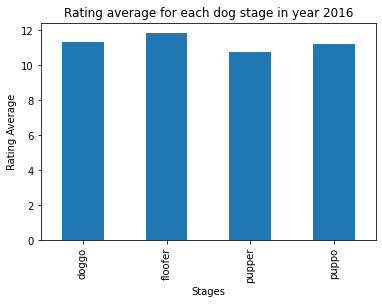

In [125]:
stage_ave.loc[2016].plot(kind='bar');
plt.xlabel('Stages');
plt.ylabel('Rating Average');
plt.title("Rating average for each dog stage in year 2016");
plt.savefig("Rate_Vs_stages16.png");

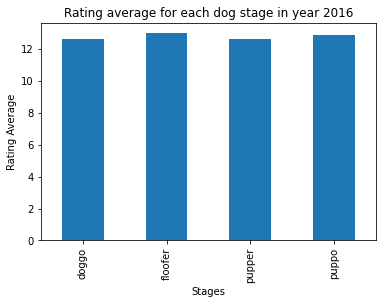

In [126]:
stage_ave.loc[2017].plot(kind = 'bar');
plt.xlabel('Stages');
plt.ylabel('Rating Average');
plt.title("Rating average for each dog stage in year 2016");
plt.savefig("Rate_Vs_stages17.png");

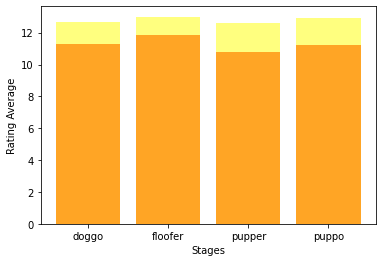

In [127]:
plt.bar(x=stage_ave.loc[2016].index,height=stage_ave.loc[2016],alpha = 0.7, color = 'red');
plt.bar(x=stage_ave.loc[2017].index,height=stage_ave.loc[2017],alpha = 0.5, color = 'yellow');
plt.xlabel('Stages');
plt.ylabel('Rating Average');
plt.savefig("Rate_Vs_stagescomb.png");

* The year 2017 sees an increase in average rating for all dog stages.

In [128]:
ret_ave

years
2015    1070.698777
2016    2709.927138
2017    5880.035294
Name: retweet_count, dtype: float64

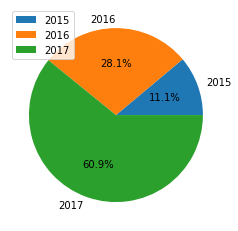

In [129]:
plt.pie(ret_ave,labels=ret_ave.index,autopct = '%1.1f%%');
plt.legend();
plt.savefig('pie.png');

##### 2017 clearly has the largest retweets with 60.9% of retweets in the 3 years being considered

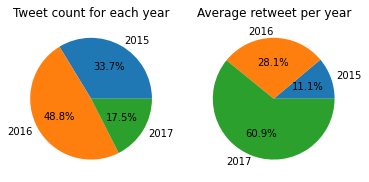

In [135]:
plt.subplot(1,2,1)
plt.pie(count_per_yr, labels = ['2015','2016','2017'],autopct = '%1.1f%%')
plt.title("Tweet count for each year")
plt.subplot(1,2,2);
plt.pie(ret_ave,labels=ret_ave.index,autopct = '%1.1f%%');
plt.title("Average retweet per year");
plt.savefig('pycomb.png');

##### Even though 2017 has the lowest count of entries as depicted by the pie chart on the left it has the highest percentage of average retweets in the one on the right.